In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
import datetime 
%matplotlib inline

# Aplicando as configurações de tema
sns.set_theme(style="darkgrid", #rc=custom_params, 
              palette="colorblind", rc={'figure.figsize':(7,6)})



In [ ]:
# Lendo o arquivo csv  
df = pd.read_csv("/content/sp_air_quality.csv", sep=";")

df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Datetime,Station,Benzene,CO,PM10,"PM2,5",NO2,O3,SO2,Toluene,TRS
0,2013-05-08 01:00:00,Araçatuba,NaN,NaN,"30,0",NaN,NaN,"7,0",NaN,NaN,NaN
1,2013-05-08 02:00:00,Araçatuba,NaN,NaN,"30,0",NaN,NaN,"6,0",NaN,NaN,NaN
2,2013-05-08 03:00:00,Araçatuba,NaN,NaN,"31,0",NaN,NaN,"6,0",NaN,NaN,NaN
3,2013-05-08 04:00:00,Araçatuba,NaN,NaN,"31,0",NaN,NaN,"4,0",NaN,NaN,NaN
4,2013-05-08 05:00:00,Araçatuba,NaN,NaN,"32,0",NaN,NaN,"4,0",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3445255,2020-09-09 20:00:00,Taubaté,NaN,NaN,32.0,38.0,4.0,51.0,NaN,NaN,NaN
3445256,2020-09-09 21:00:00,Taubaté,NaN,NaN,32.0,38.0,3.0,40.0,NaN,NaN,NaN
3445257,2020-09-09 22:00:00,Taubaté,NaN,NaN,32.0,38.0,4.0,35.0,NaN,NaN,NaN
3445258,2020-09-09 23:00:00,Taubaté,NaN,NaN,33.0,38.0,6.0,30.0,NaN,NaN,NaN


In [ ]:
# Mostrando colunas que tem valores nulos

df.isnull().sum()

Datetime          0
Station           0
Benzene     3259548
CO          2441510
PM10         650348
PM2,5       2386037
NO2         1465284
O3           736870
SO2         2644990
Toluene     3259790
TRS         3383630
dtype: int64

In [ ]:
# Dropando colunas que possuem valores NaN
df.dropna(axis=1, how='all', inplace = True )

In [ ]:
# Visualizando para verificar se as colunas foram dropadas
df.isnull().sum()

Datetime          0
Station           0
Benzene     3259548
CO          2441510
PM10         650348
PM2,5       2386037
NO2         1465284
O3           736870
SO2         2644990
Toluene     3259790
TRS         3383630
dtype: int64

In [ ]:
Piores cidades para se morar
Analíse de classificação
Qualidade do ar 
Lugar bom pra morar / lugar ruim pra morar

Mostrar as pessoas as pessoas as cidades com pior qualidade do ar para que possam fazer escolhas de onde residir
# Substituindo o tipo da coluna 'Datetime' para o tipo 'Datetime'
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Substituindo a ',' por '.' 
df['CO'] = df['CO'].str.replace(',', '.')
df['PM10'] = df['PM10'].str.replace(',', '.')
df['PM2,5'] = df['PM2,5'].str.replace(',', '.')
df['NO2'] = df['NO2'].str.replace(',', '.')
df['O3'] = df['O3'].str.replace(',', '.')
df['SO2'] = df['SO2'].str.replace(',', '.')

df.dtypes



Datetime    datetime64[ns]
Station             object
Benzene             object
CO                  object
PM10                object
PM2,5               object
NO2                 object
O3                  object
SO2                 object
Toluene             object
TRS                 object
dtype: object

In [ ]:
#Criando nova coluna de tempo

df['Date'] = [d.date() for d in df['Datetime']]
df['time'] = [d.time() for d in df['Datetime']]


#Dropando coluna antiga Datetime 
del df['Datetime']

In [ ]:
df[['CO']].astype(float)

df[['PM10']].astype(float)
df[['PM2,5']].astype(float)
df[['NO2']].astype(float)
df[['O3']].astype(float)
df[['SO2']].astype(float)

,SO2
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3445255,NaN
3445256,NaN
3445257,NaN
3445258,NaN


In [ ]:
# Substituição de valores nan para 0
df = df.replace(np.nan, 0) 


# inplace
df.replace(np.nan, 0, inplace=True)

print(df)


           Station Benzene CO  PM10 PM2,5 NO2   O3 SO2 Toluene TRS  \
0        Araçatuba       0  0  30.0     0   0  7.0   0       0   0   
1        Araçatuba       0  0  30.0     0   0  6.0   0       0   0   
2        Araçatuba       0  0  31.0     0   0  6.0   0       0   0   
3        Araçatuba       0  0  31.0     0   0  4.0   0       0   0   
4        Araçatuba       0  0  32.0     0   0  4.0   0       0   0   
...            ...     ... ..   ...   ...  ..  ...  ..     ...  ..   
3445255    Taubaté       0  0     0     0   0    0   0       0   0   
3445256    Taubaté       0  0     0     0   0    0   0       0   0   
3445257    Taubaté       0  0     0     0   0    0   0       0   0   
3445258    Taubaté       0  0     0     0   0    0   0       0   0   
3445259    Taubaté       0  0     0     0   0    0   0       0   0   

               Date      time  
0        2013-05-08  01:00:00  
1        2013-05-08  02:00:00  
2        2013-05-08  03:00:00  
3        2013-05-08  04:00:00  

In [ ]:
# Alterando os tipos de cada coluna para float
data_type_dict = {'CO' : float, 'PM10' : float, 'PM2,5' : float, 'NO2' : float, 'O3' : float, 'SO2' : float}
df = df.astype(data_type_dict)

In [ ]:
# Verificando os tipos de cada coluna
df.dtypes

Station     object
Benzene     object
CO         float64
PM10       float64
PM2,5      float64
NO2        float64
O3         float64
SO2        float64
Toluene     object
TRS         object
Date        object
time        object
dtype: object

In [ ]:
print(df.corr(method='spearman'))



             CO      PM10     PM2,5       NO2        O3       SO2
CO     1.000000  0.066580  0.296105  0.170443 -0.199720  0.170545
PM10   0.066580  1.000000 -0.007455  0.242526 -0.020250  0.302111
PM2,5  0.296105 -0.007455  1.000000  0.206681  0.063450  0.077317
NO2    0.170443  0.242526  0.206681  1.000000  0.005705  0.437667
O3    -0.199720 -0.020250  0.063450  0.005705  1.000000 -0.179287
SO2    0.170545  0.302111  0.077317  0.437667 -0.179287  1.000000


In [ ]:
#Agrupando por cidade

print(df.groupby('Station').mean())


                             CO       PM10      PM2,5       NO2         O3  \
Station                                                                      
Americana              0.000000  19.058862   0.000000  0.000000  15.684038   
Araraquara             0.000000  21.020206   0.000000  3.301013  17.193220   
Araçatuba              0.000000  21.632171   0.000000  0.000000  16.422235   
Bauru                  0.000000  19.642013   0.000000  2.988273  15.009667   
Campinas-Centro        2.774701  21.096239   0.000000  0.000000   0.000000   
...                         ...        ...        ...       ...        ...   
São Caetano do Sul     2.421372  24.367553   7.603057  6.720550  13.773590   
São José do Rio Preto  0.000000  25.632944  22.328112  3.560699  13.755354   
Taboão da Serra        3.489917  22.111760   0.000000  0.000000   0.000000   
Tatuí                  0.000000  15.444703   0.000000  1.516139  17.135650   
Taubaté                1.083627  15.320161  14.694094  2.654332 

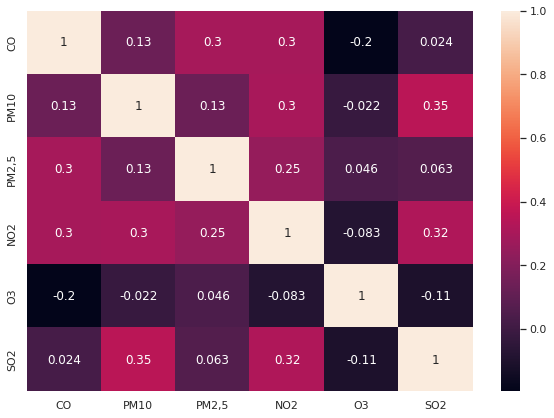

In [ ]:
correlacao = df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlacao, annot=True)

In [ ]:
df.loc[df["Station"]=="Araçatuba",["PM10"]].mean()

PM10    21.632171
dtype: float64

In [ ]:
df

,Station,Benzene,CO,PM10,"PM2,5",NO2,O3,SO2,Toluene,TRS,Date,time
0,Araçatuba,0,0.0,30.0,0.0,0.0,7.0,0.0,0,0,2013-05-08,01:00:00
1,Araçatuba,0,0.0,30.0,0.0,0.0,6.0,0.0,0,0,2013-05-08,02:00:00
2,Araçatuba,0,0.0,31.0,0.0,0.0,6.0,0.0,0,0,2013-05-08,03:00:00
3,Araçatuba,0,0.0,31.0,0.0,0.0,4.0,0.0,0,0,2013-05-08,04:00:00
4,Araçatuba,0,0.0,32.0,0.0,0.0,4.0,0.0,0,0,2013-05-08,05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3445255,Taubaté,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2020-09-09,20:00:00
3445256,Taubaté,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2020-09-09,21:00:00
3445257,Taubaté,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2020-09-09,22:00:00
3445258,Taubaté,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2020-09-09,23:00:00


In [ ]:
te = df.groupby(
     by=['Station']).agg({
          "PM10":'mean'
      }).sort_values('PM10', ascending = False).head(10)

In [ ]:
te

,PM10
Station,
"Cubatão-V,Parisi",61.163708
Cubatão-Vale do Mogi,34.967077
Santa Gertrudes,34.155238
Osasco,30.251095
Grajaú-Parelheiros,27.186756
Piracicaba,25.949488
São José do Rio Preto,25.632944
Catanduva,25.554750
"Marg,Tietê-Pte Remédios",25.102781


In [ ]:
te = (df.groupby(by=['Date','Station']).sum().groupby(level=[0]).cumsum())

In [ ]:
te

CO    PM10  PM2,5    NO2      O3  SO2
Date       Station                                                       
2013-05-08 Araraquara              0.0   621.0    0.0  133.0   441.0  0.0
           Araçatuba               0.0  1597.0    0.0  133.0   711.0  0.0
           Bauru                   0.0  2248.0    0.0  244.0  1010.0  0.0
           Campinas-Centro        83.0  2978.0    0.0  244.0  1010.0  0.0
           Capão Redondo          83.0  3590.0    0.0  244.0  1311.0  0.0
...                                ...     ...    ...    ...     ...  ...
2020-09-09 São Caetano do Sul      0.0     0.0    0.0    0.0     0.0  0.0
           São José do Rio Preto   0.0     0.0    0.0    0.0     0.0  0.0
           Taboão da Serra         0.0     0.0    0.0    0.0     0.0  0.0
           Tatuí                   0.0     0.0    0.0    0.0     0.0  0.0
           Taubaté                 0.0     0.0    0.0    0.0     0.0  0.0

[144879 rows x 6 columns]

In [ ]:
#Correlação
print(df.corr()['SO2'].sort_values())

O3      -0.105637
CO       0.023955
PM2,5    0.062957
NO2      0.321138
PM10     0.352374
SO2      1.000000
Name: SO2, dtype: float64


In [ ]:
#Correlação
print(df.corr()['CO'].sort_values())

O3      -0.195739
SO2      0.023955
PM10     0.134527
NO2      0.296203
PM2,5    0.296603
CO       1.000000
Name: CO, dtype: float64


#### ***a) Por que o(s) algoritmo(s) selecionado(s) pode(m) resolver este problema?***

*   Piores cidades para se morar


---


#### ***b) Quais variáveis preditoras seriam interessantes de se coletar para este problema? Por quê?***

*   Análise de classificação


---


#### ***c) Qual/quais seriam as variáveis-resposta para esse problema? Por quê?***

*   Qualidade do ar


---


#### ***d) Qual seria a saída do modelo?***


*   Lugar bom pra morar / lugar ruim pra morar


---


#### ***e) Quais benefícios são esperados com a implementação deste(s) algoritmo(s)***?

*   Mostrar as pessoas as pessoas as cidades com pior qualidade do ar para que possam fazer escolhas de onde residir
